In [1]:
import cv2
import numpy as np
import skimage.filters as filters
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.filters import threshold_otsu

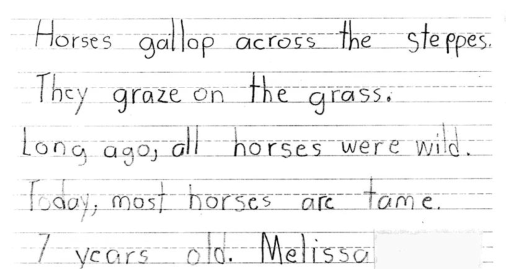

In [9]:
# Load the image
img_path = '../_data/resource/note_child.jpg'
base_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
# Turn off the axis
plt.axis('off')
# Show image
plt.imshow(base_img, cmap='gray')

## Helper for subplot

In [3]:
def _subplot(titles, images):
    # Assuming 'images' and 'titles' are defined earlier in your code
    num_images = len(images)
    num_rows = num_images // 2 + num_images % 2  # Add an extra row if the number of images is odd

    # Display all images
    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 24))
    axs = axs.ravel()  # Flatten the array of axes

    for i, ax in enumerate(axs):
        if i < num_images:
            ax.imshow(images[i], cmap='gray')
            ax.set_title(titles[i], fontsize=30)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

## Blurring

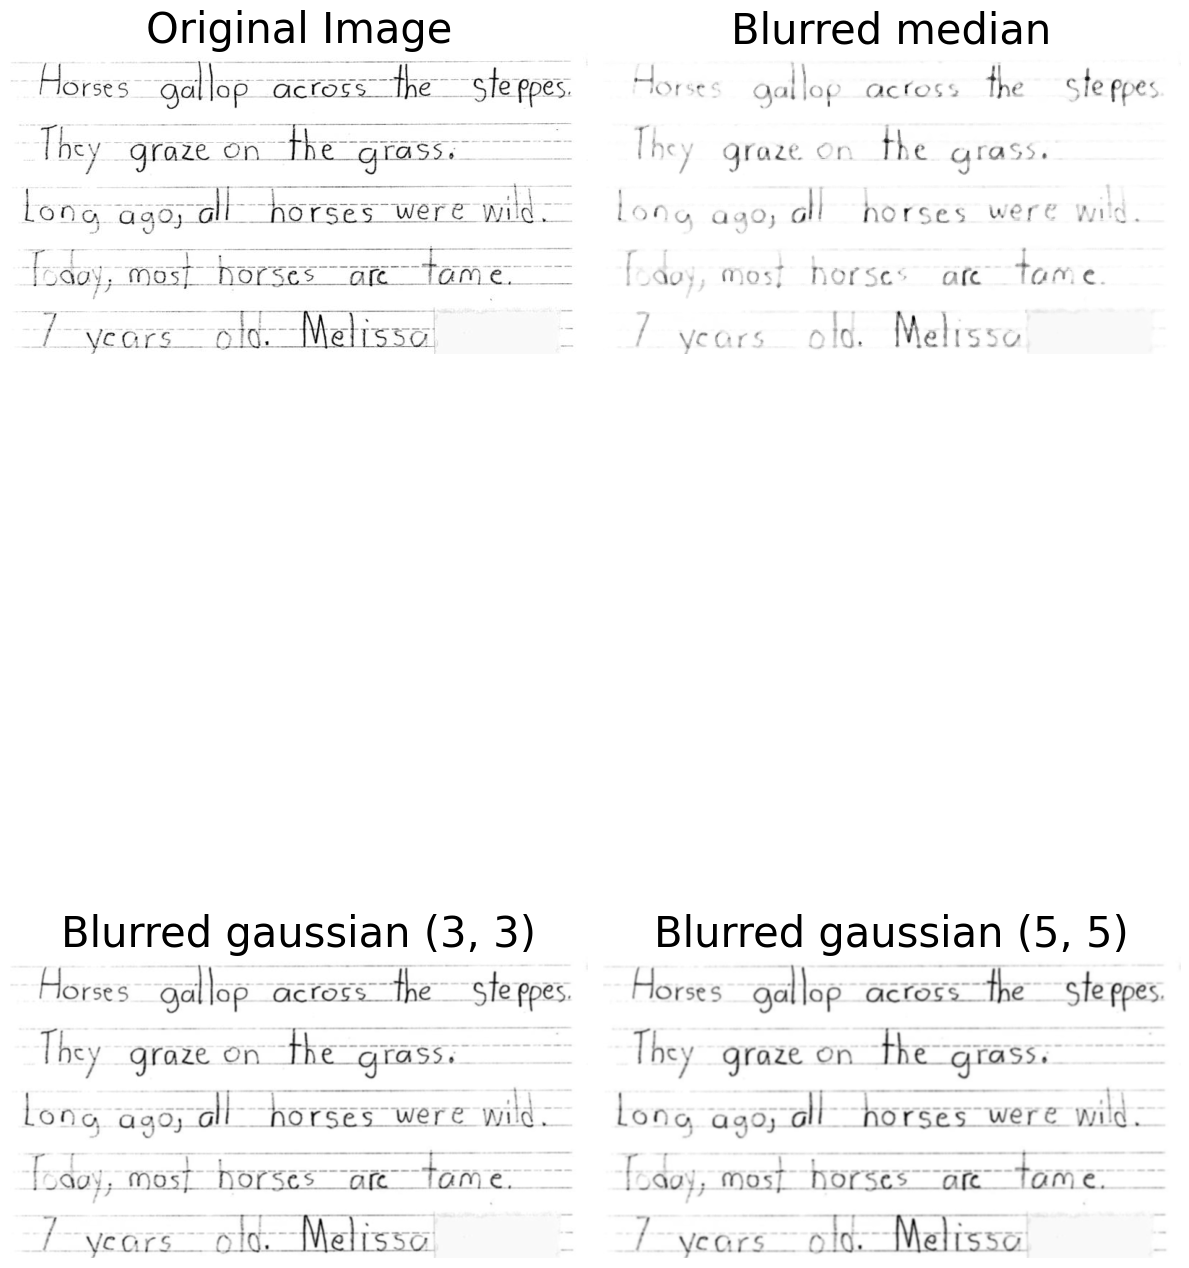

In [10]:
img = base_img

# Apply median blur
img_blur_median = cv2.medianBlur(img, 5)

# Apply Gaussian blur
k_filter1 = (3, 3)
img_blur1 = cv2.GaussianBlur(img, k_filter1, 0)
k_filter2 = (5, 5)
img_blur2 = cv2.GaussianBlur(img, k_filter2, 0)

titles = ['Original Image', 'Blurred median',
          f'Blurred gaussian {k_filter1}', f'Blurred gaussian {k_filter2}']
images = [img, img_blur_median, img_blur1, img_blur2]
_subplot(titles, images)

## Invert image

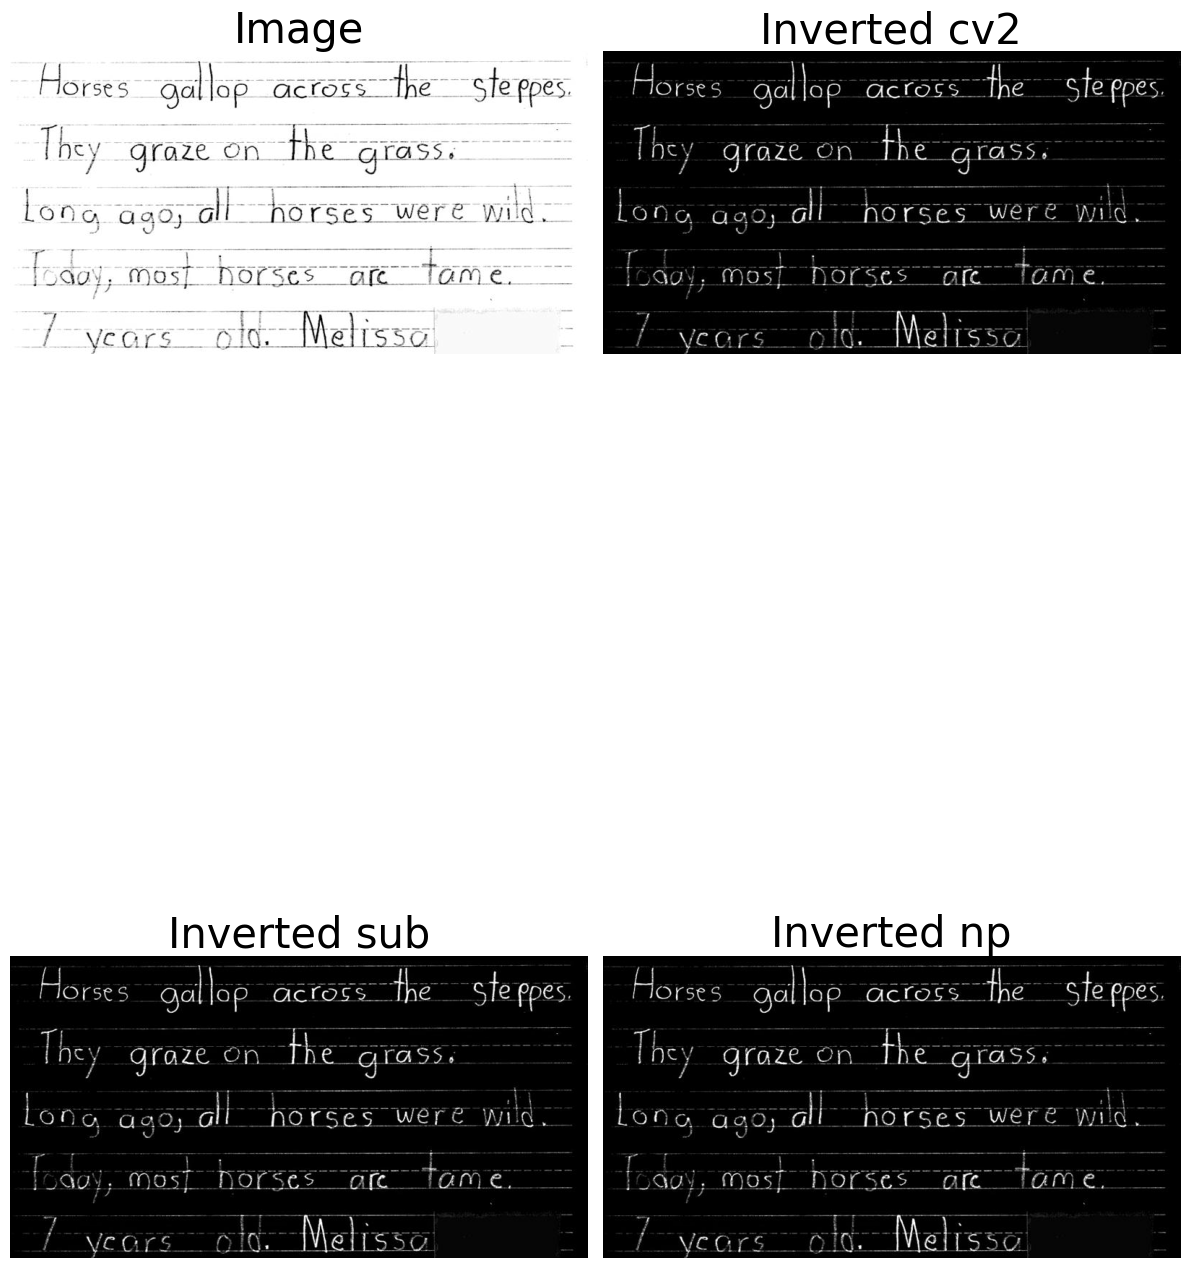

In [11]:
img = base_img

# Invert the image
img_inv1 = cv2.bitwise_not(img)
# Inverse by subtracting from 255
img_inv2 = 255 - img
# Invert with numpy
img_inv3 = np.invert(img)

titles = ['Image', 'Inverted cv2', 'Inverted sub', 'Inverted np']
images = [img, img_inv1, img_inv2, img_inv3]

_subplot(titles, images)

## Thresholding

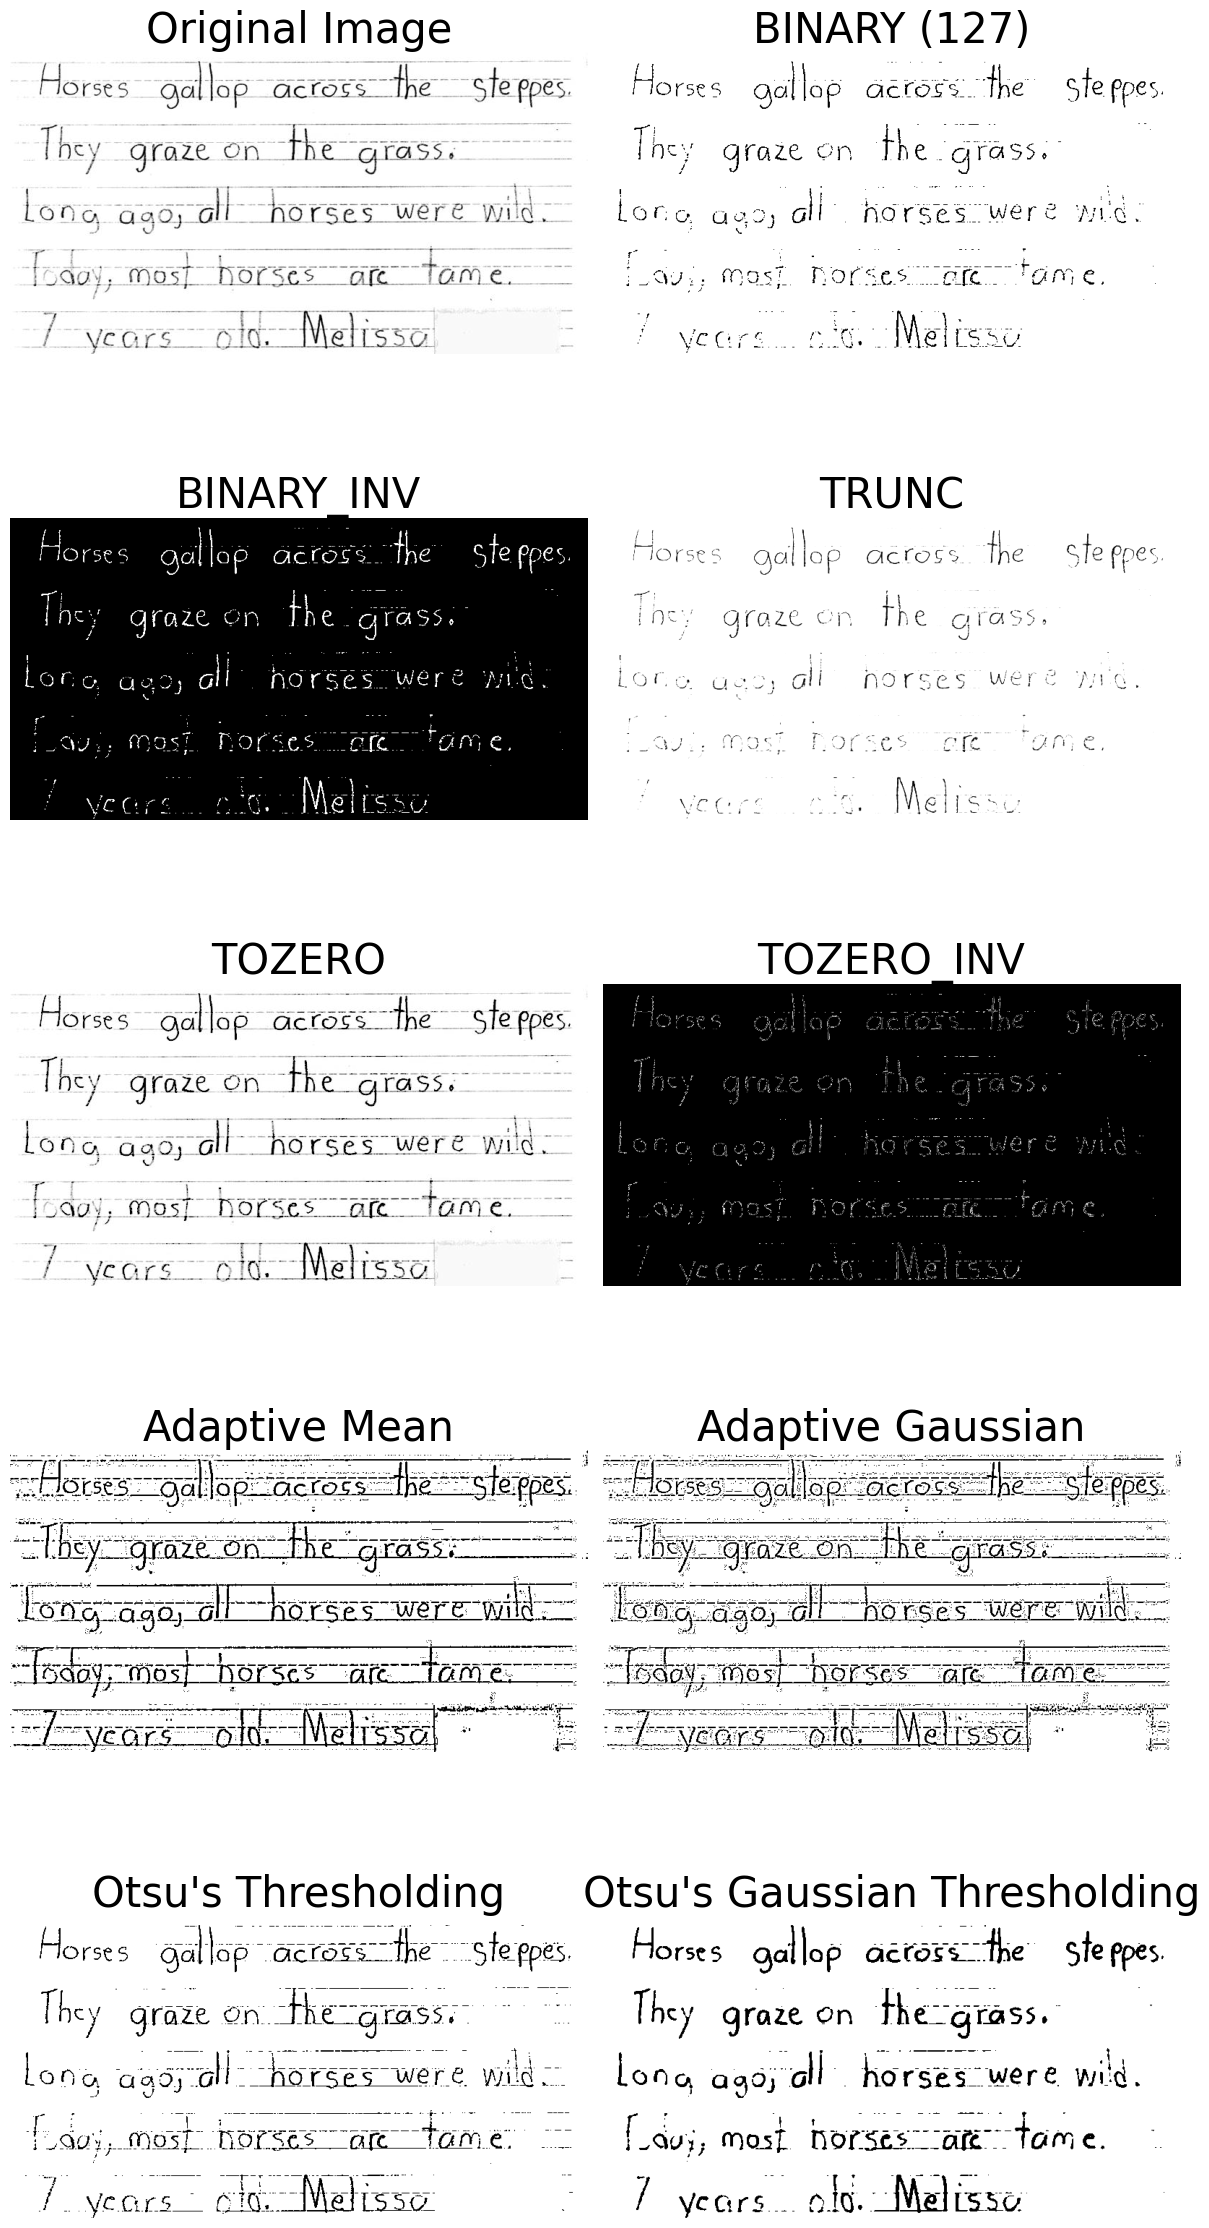

In [15]:
img = base_img

cutoff_val = 127 # everything above this is set to the cutoff val
set_color = 255 # if
window_sz = 11

# Simple Thresholding
_,img_bin = cv2.threshold(img,cutoff_val,set_color,cv2.THRESH_BINARY)
_,img_bin_inv = cv2.threshold(img,cutoff_val,set_color,cv2.THRESH_BINARY_INV)
_,thresh3 = cv2.threshold(img,cutoff_val,set_color,cv2.THRESH_TRUNC)
_,thresh4 = cv2.threshold(img,cutoff_val,set_color,cv2.THRESH_TOZERO)
_,thresh5 = cv2.threshold(img,cutoff_val,set_color,cv2.THRESH_TOZERO_INV)

# Adaptive Thresholding
thresh6 = cv2.adaptiveThreshold(img,set_color,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,window_sz,2)
thresh7 = cv2.adaptiveThreshold(img,set_color,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,window_sz,2)

# Otsu's Binarization

# Otsu's thresholding
_,thresh8 = cv2.threshold(img,0,set_color,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
_,thresh9 = cv2.threshold(blur,0,set_color,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


titles = ['Original Image',f'BINARY ({cutoff_val})','BINARY_INV','TRUNC','TOZERO','TOZERO_INV',
          'Adaptive Mean', 'Adaptive Gaussian',
          "Otsu's Thresholding", "Otsu's Gaussian Thresholding"]
images = [img, img_bin, img_bin_inv, thresh3, thresh4, thresh5,
          thresh6, thresh7,
          thresh8, thresh9]

_subplot(titles, images)

## Sharpen an image

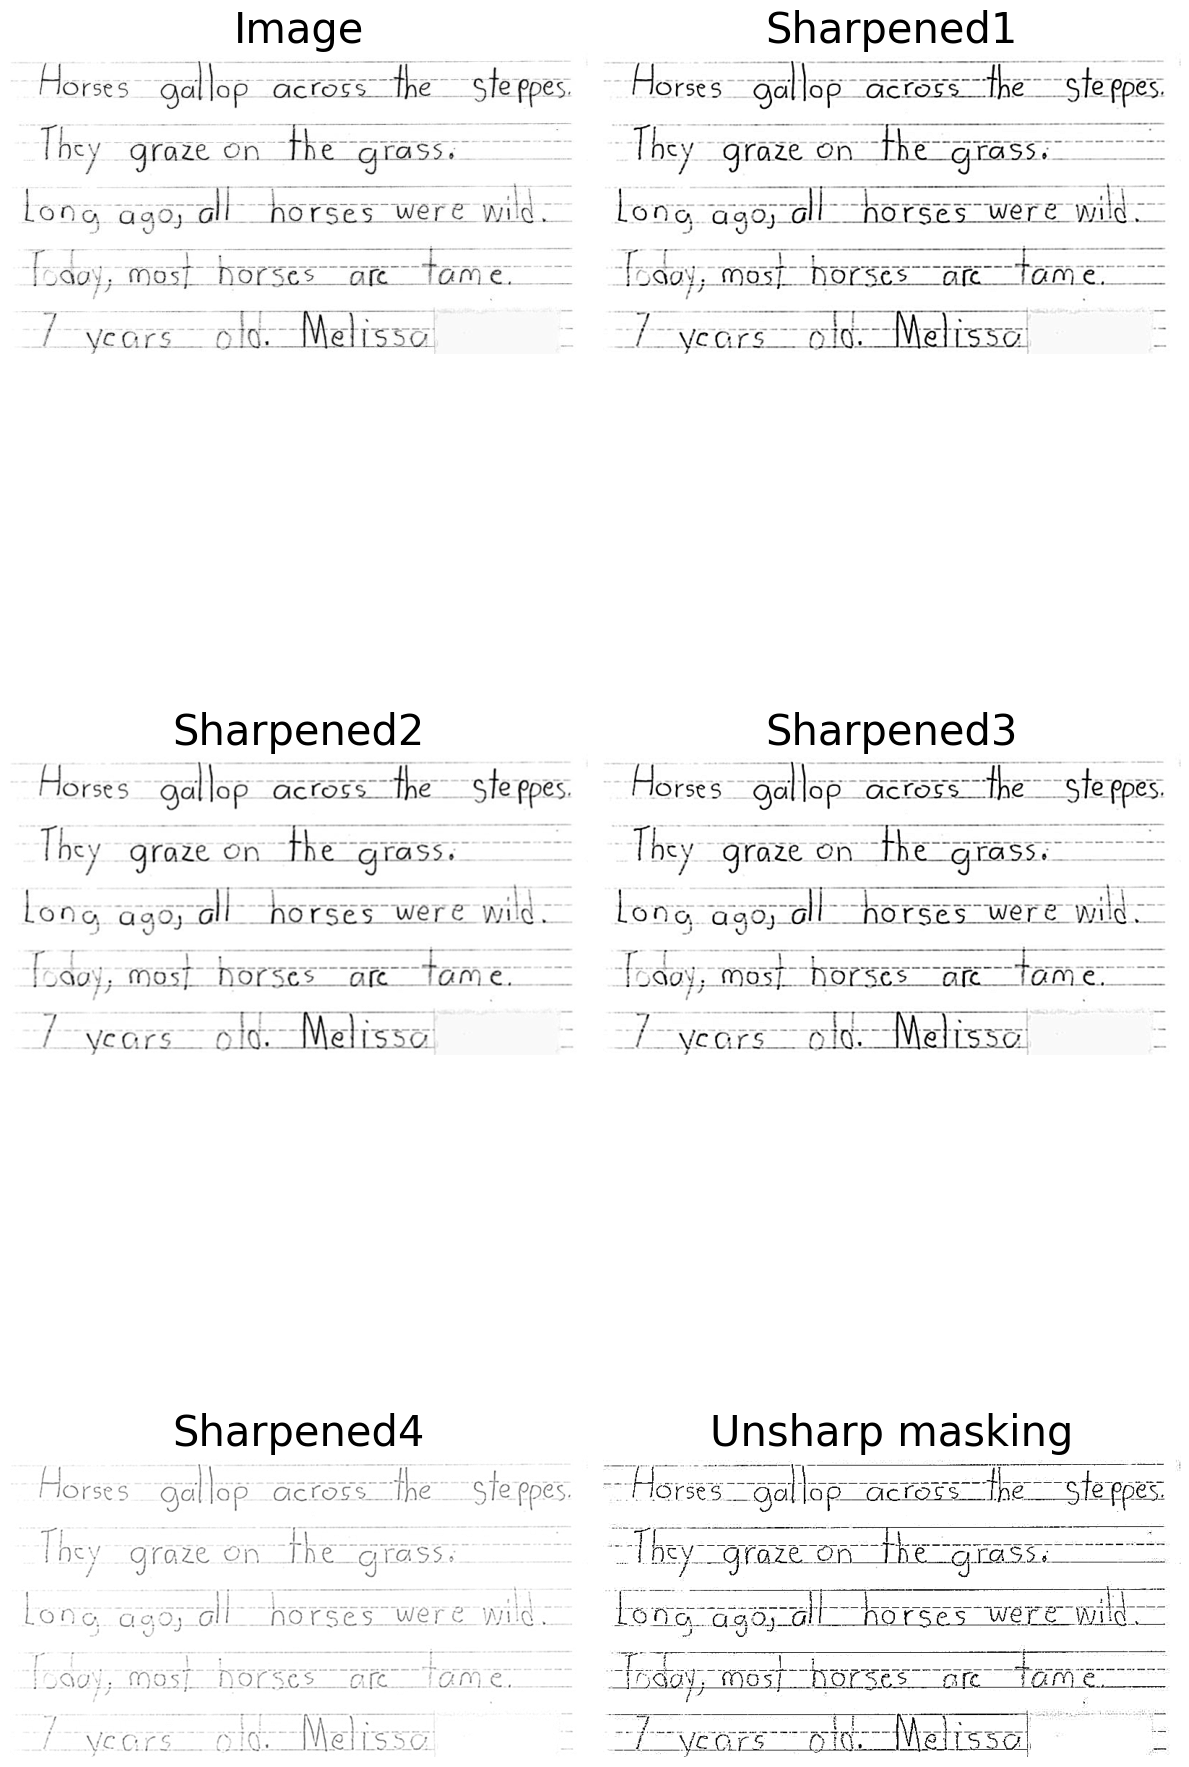

In [13]:
img = base_img

# Apply GaussianBlur to reduce noise and create a smoother image
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Create a sharpening kernel
kernel1 = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

kernel2 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

kernel3 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, 0]])

kernel4 = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

# Apply the kernel to the blurred image using the filter2D function
img_sharpened1 = cv2.filter2D(img_blur, -1, kernel1)
img_sharpened2 = cv2.filter2D(img_blur, -1, kernel2)
img_sharpened3 = cv2.filter2D(img_blur, -1, kernel3)
img_sharpened4 = cv2.filter2D(img_blur, -1, kernel4)

# divide gray by morphology image
img_division = cv2.divide(img, img_blur, scale=255)

# sharpen using unsharp masking
img_sharp = filters.unsharp_mask(img_division, radius=11, amount=11, preserve_range=False)
img_sharpened5 = (255 * img_sharp).clip(0, 255).astype(np.uint8)


titles = ['Image', 'Sharpened1', 'Sharpened2', 'Sharpened3', 'Sharpened4',
          'Unsharp masking']
images = [img, img_sharpened1, img_sharpened2, img_sharpened3, (255 - img_sharpened4),
          img_sharpened5]

_subplot(titles, images)

## Edge detection techniques

### Laplacian edge detection

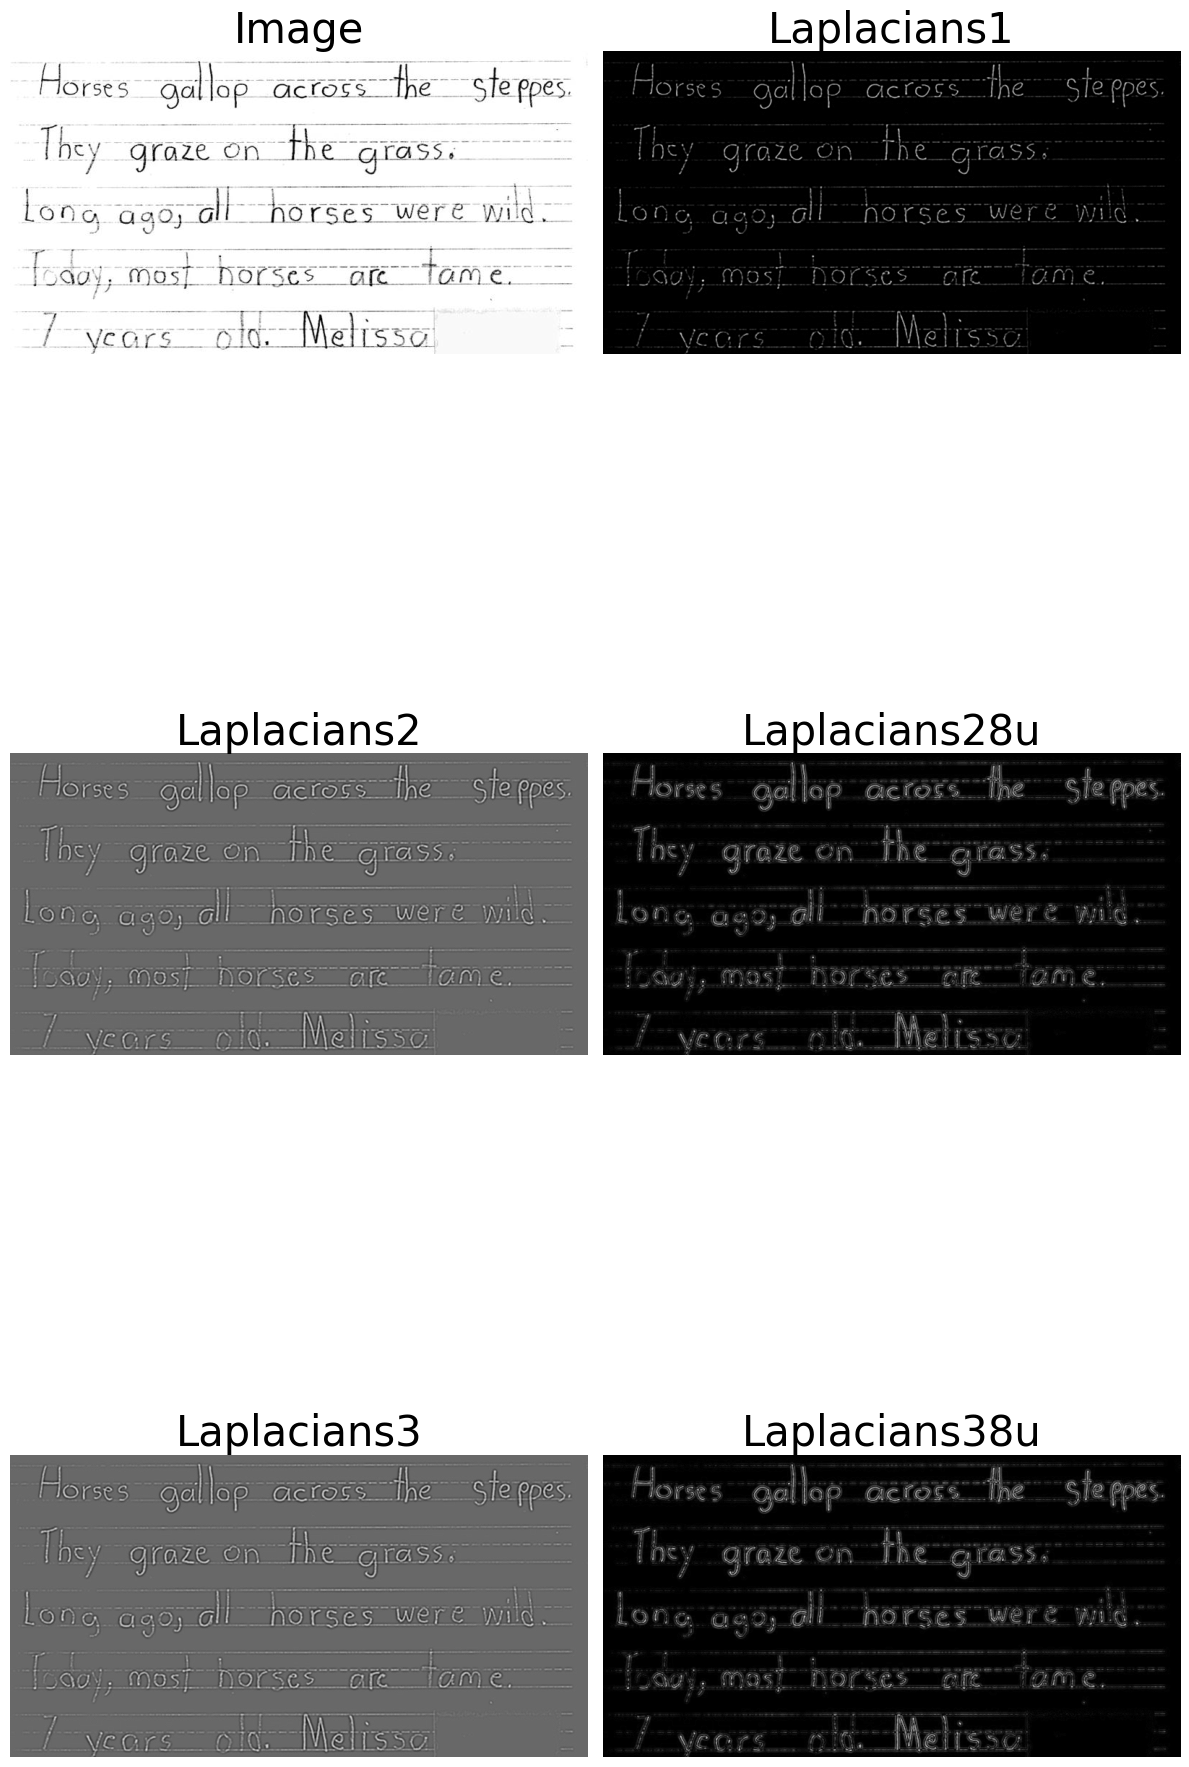

In [12]:
img = base_img

# Apply Gaussian blur to reduce noise and improve edge detection
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Sharpen the image using the Laplacian operator
laplacian1 = cv2.Laplacian(img_blur, cv2.CV_8UC1)

# Apply Laplacian operator
laplacian2 = cv2.Laplacian(img_blur, cv2.CV_64F)

# Convert back to uint8
laplacian2_8u = cv2.convertScaleAbs(laplacian2)

# Apply Laplacian operator using a higher depth
laplacian3 = cv2.Laplacian(img_blur, cv2.CV_16S)

# Convert back to 8-bit unsigned integer
laplacian3_8u = cv2.convertScaleAbs(laplacian3)

titles = ['Image', 'Laplacians1', 'Laplacians2', 'Laplacians28u', 'Laplacians3', 'Laplacians38u']
images = [img, laplacian1, laplacian2, laplacian2_8u, laplacian3, laplacian3_8u]

_subplot(titles, images)

### Difference of Gaussians (DoG) 

In [ ]:
img = base_img

# Set the values of sigma for the two Gaussian blurs
sigma1 = 1.0
sigma2 = 3.0

# Apply Gaussian blur with sigma1 and sigma2
img_blur1 = cv2.GaussianBlur(img, (0, 0), sigma1)
img_blur2 = cv2.GaussianBlur(img, (0, 0), sigma2)

# Calculate the DoG by subtracting the blurred images
img_dog = img_blur1 - img_blur2

### Canny edge detection

In [ ]:
img = base_img

# Apply Gaussian blur to reduce noise and improve edge detection
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Set the low and high threshold values for Canny edge detection
low_threshold = 50
high_threshold = 190

# Apply Canny edge detection
img_canny = cv2.Canny(img_blur, low_threshold, high_threshold)

### Sobel edge detection

In [ ]:
img = base_img

# Apply Sobel operator in the x and y directions
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the result to 8-bit for display
img_sobel = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

### Prewitt  edge detection

In [ ]:
img = base_img

# Apply Prewitt operator in the x and y directions
prewitt_x = cv2.filter2D(img, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(img, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

# Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Normalize the result to 8-bit for display
img_prewitt = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

### Roberts cross edge detection

In [ ]:
img = base_img

# Apply Roberts Cross operator in the x and y directions
roberts_x = cv2.filter2D(img, cv2.CV_64F, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(img, cv2.CV_64F, np.array([[0, 1], [-1, 0]]))

# Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(roberts_x**2 + roberts_y**2)

# Normalize the result to 8-bit for display
img_roberts = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

### Scharr edge detection

In [ ]:
img = base_img

# Apply Scharr operator in the x and y directions
scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)

# Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(scharr_x**2 + scharr_y**2)

# Normalize the result to 8-bit for display
img_scharr = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

### Frei-Chen edge detection

In [ ]:
img = base_img

# Apply Frei-Chen operator in the x and y directions
frei_chen_x = cv2.filter2D(img, cv2.CV_64F, np.array([[-1, -np.sqrt(2), -1], [0, 0, 0], [1, np.sqrt(2), 1]]))
frei_chen_y = cv2.filter2D(img, cv2.CV_64F, np.array([[-1, 0, 1], [-np.sqrt(2), 0, np.sqrt(2)], [-1, 0, 1]]))

# Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(frei_chen_x**2 + frei_chen_y**2)

# Normalize the result to 8-bit for display
img_frei_chen = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

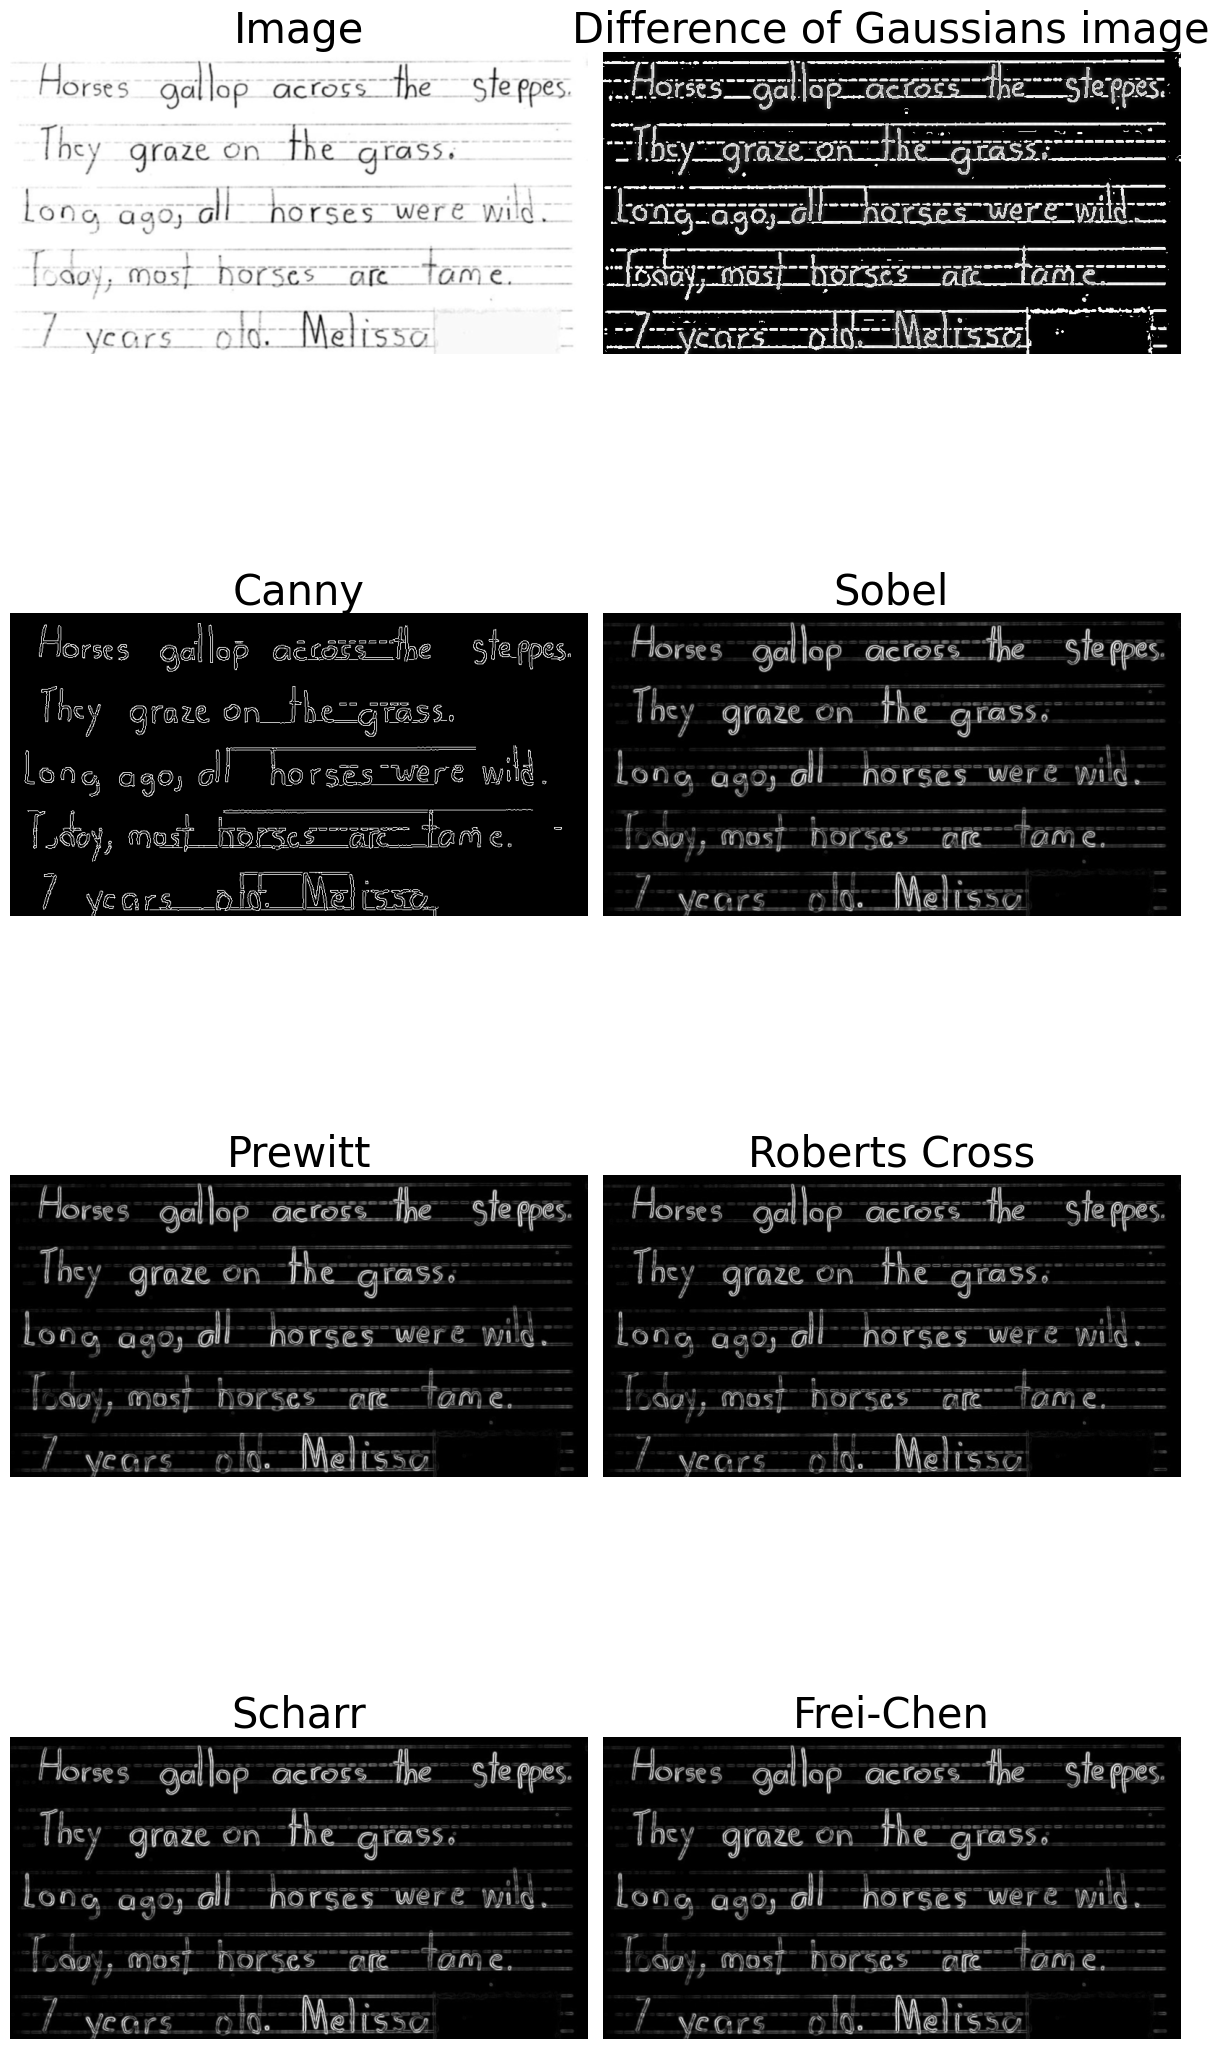

In [ ]:
titles = ['Image', 'Difference of Gaussians image',
          'Canny', 'Sobel', 'Prewitt', 'Roberts Cross', 'Scharr', 'Frei-Chen']
images = [img, img_dog, img_canny, img_sobel, img_prewitt,
          img_roberts, img_scharr, img_frei_chen]

_subplot(titles, images)

# Perform morphological operations

Threshold value: 191
Max value: 255


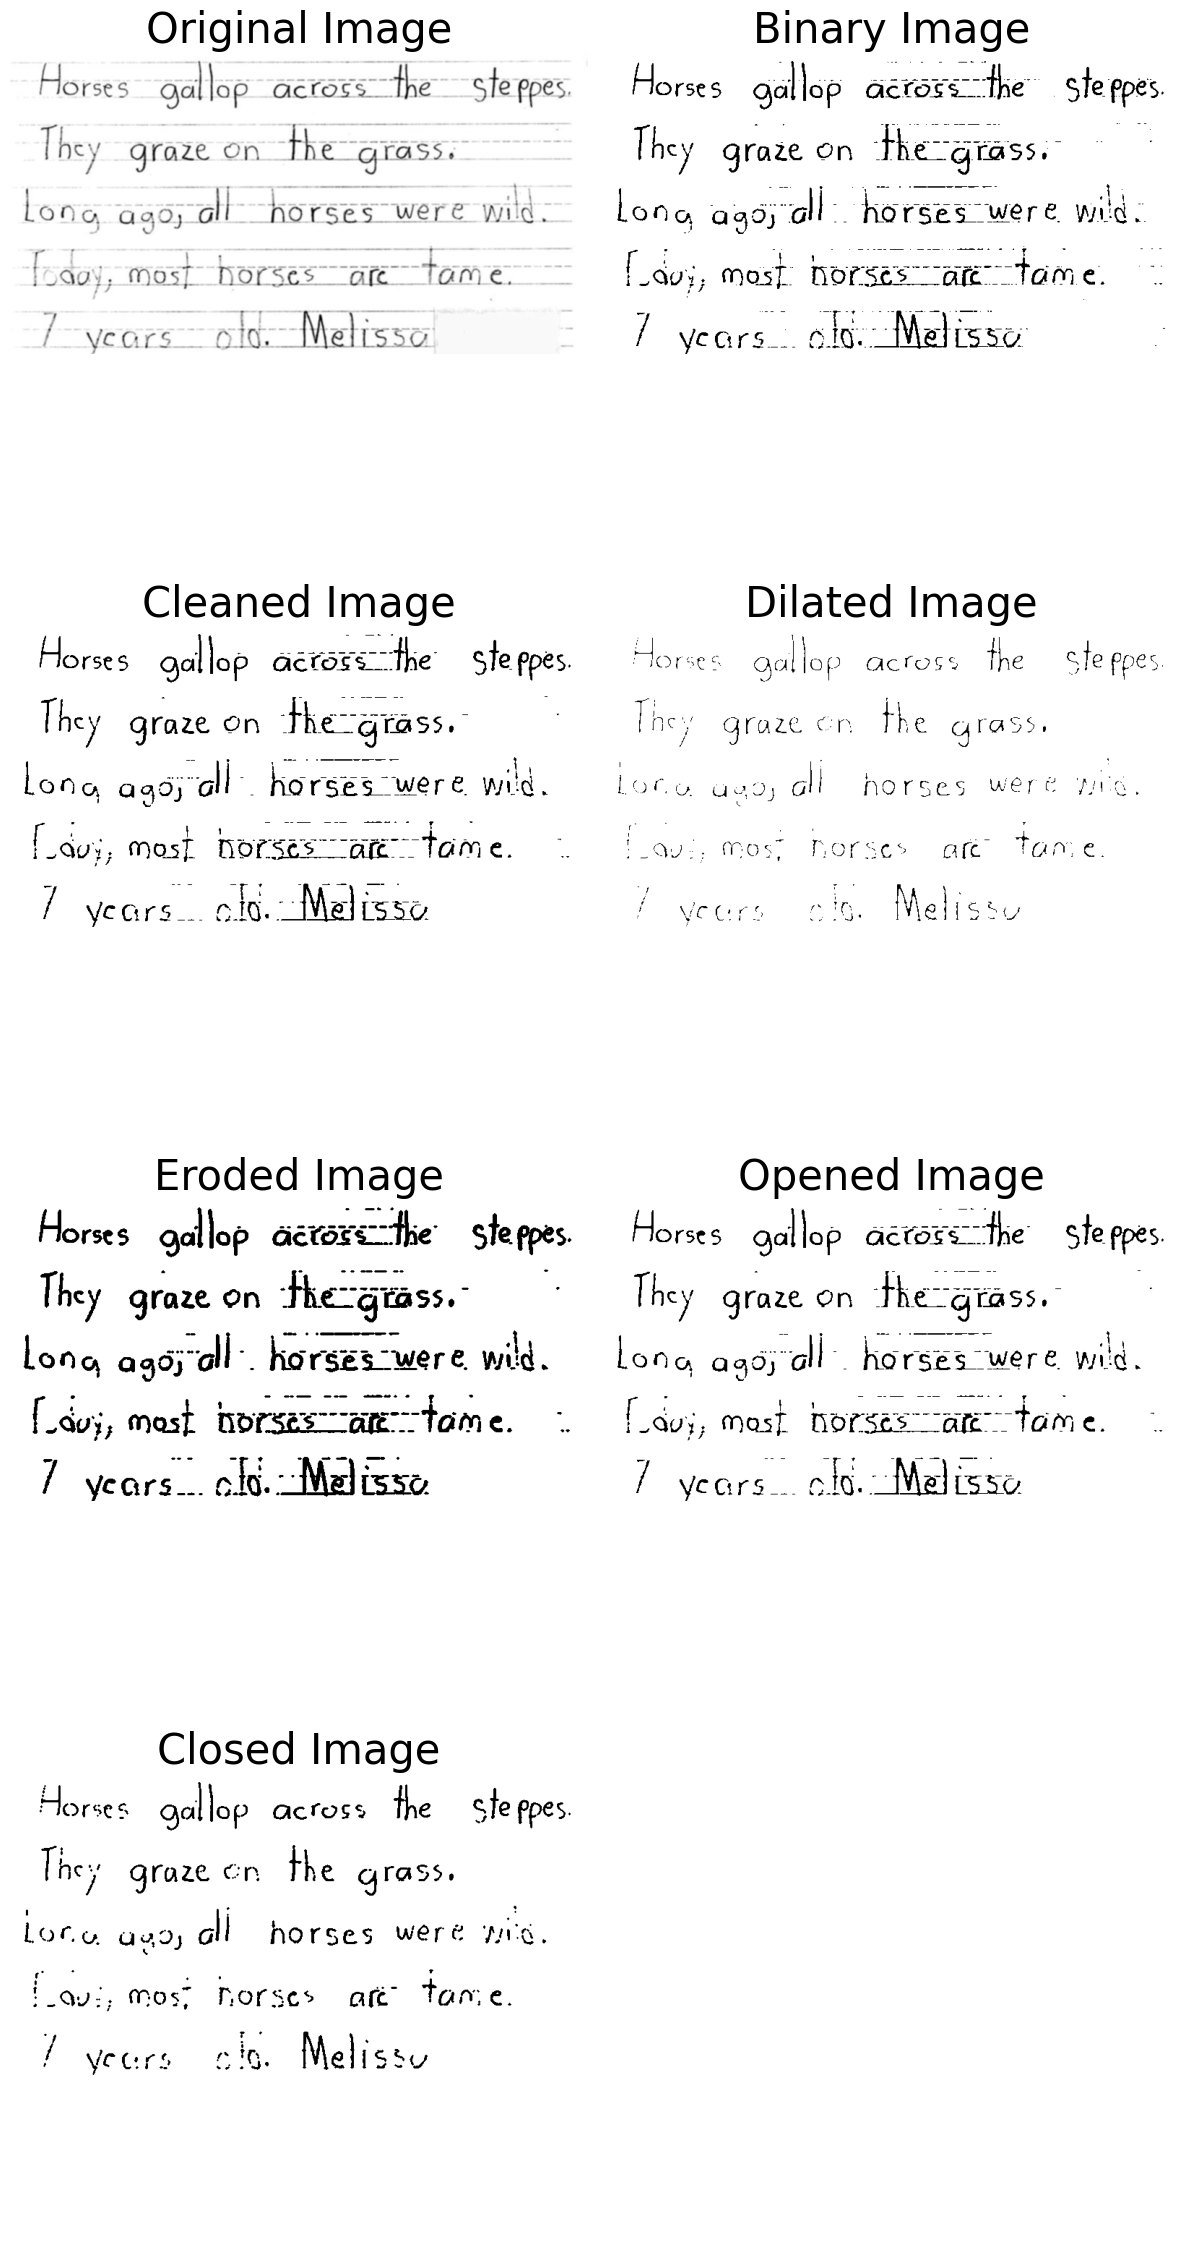

In [ ]:
img = base_img

# Apply Otsu's thresholding to get a binary image
threshold_value = threshold_otsu(img)
binary_image = img > threshold_value
print(f"Threshold value: {threshold_value}")
print(f"Max value: {img.max()}")

# Simple Thresholding
# _,binary_image = cv2.threshold(img,threshold_value,255,cv2.THRESH_BINARY)

# Ensure binary image with values 0 or 255 converted to boolean array
binary_image_bool = binary_image > 0

# Remove small objects and holes
cleaned_image = morphology.remove_small_objects(binary_image_bool, min_size=4, connectivity=2)
cleaned_image = morphology.remove_small_holes(cleaned_image, area_threshold=4)

# Different morphological operations

# Dilation (expand bright areas)
dilated_image = morphology.binary_dilation(cleaned_image)

# Erosion (shrink bright areas)
eroded_image = morphology.binary_erosion(cleaned_image)

# Opening (remove small bright spots)
opened_image = morphology.binary_opening(cleaned_image)

# Closing (remove small dark spots)
closed_image = morphology.binary_closing(cleaned_image)

# Organize images and titles for plotting
titles = ['Original Image', 'Binary Image', 'Cleaned Image', 'Dilated Image', 'Eroded Image', 'Opened Image', 'Closed Image']
images = [img, binary_image, cleaned_image, dilated_image, eroded_image, opened_image, closed_image]

_subplot(titles, images)


## Opencv morphological operations

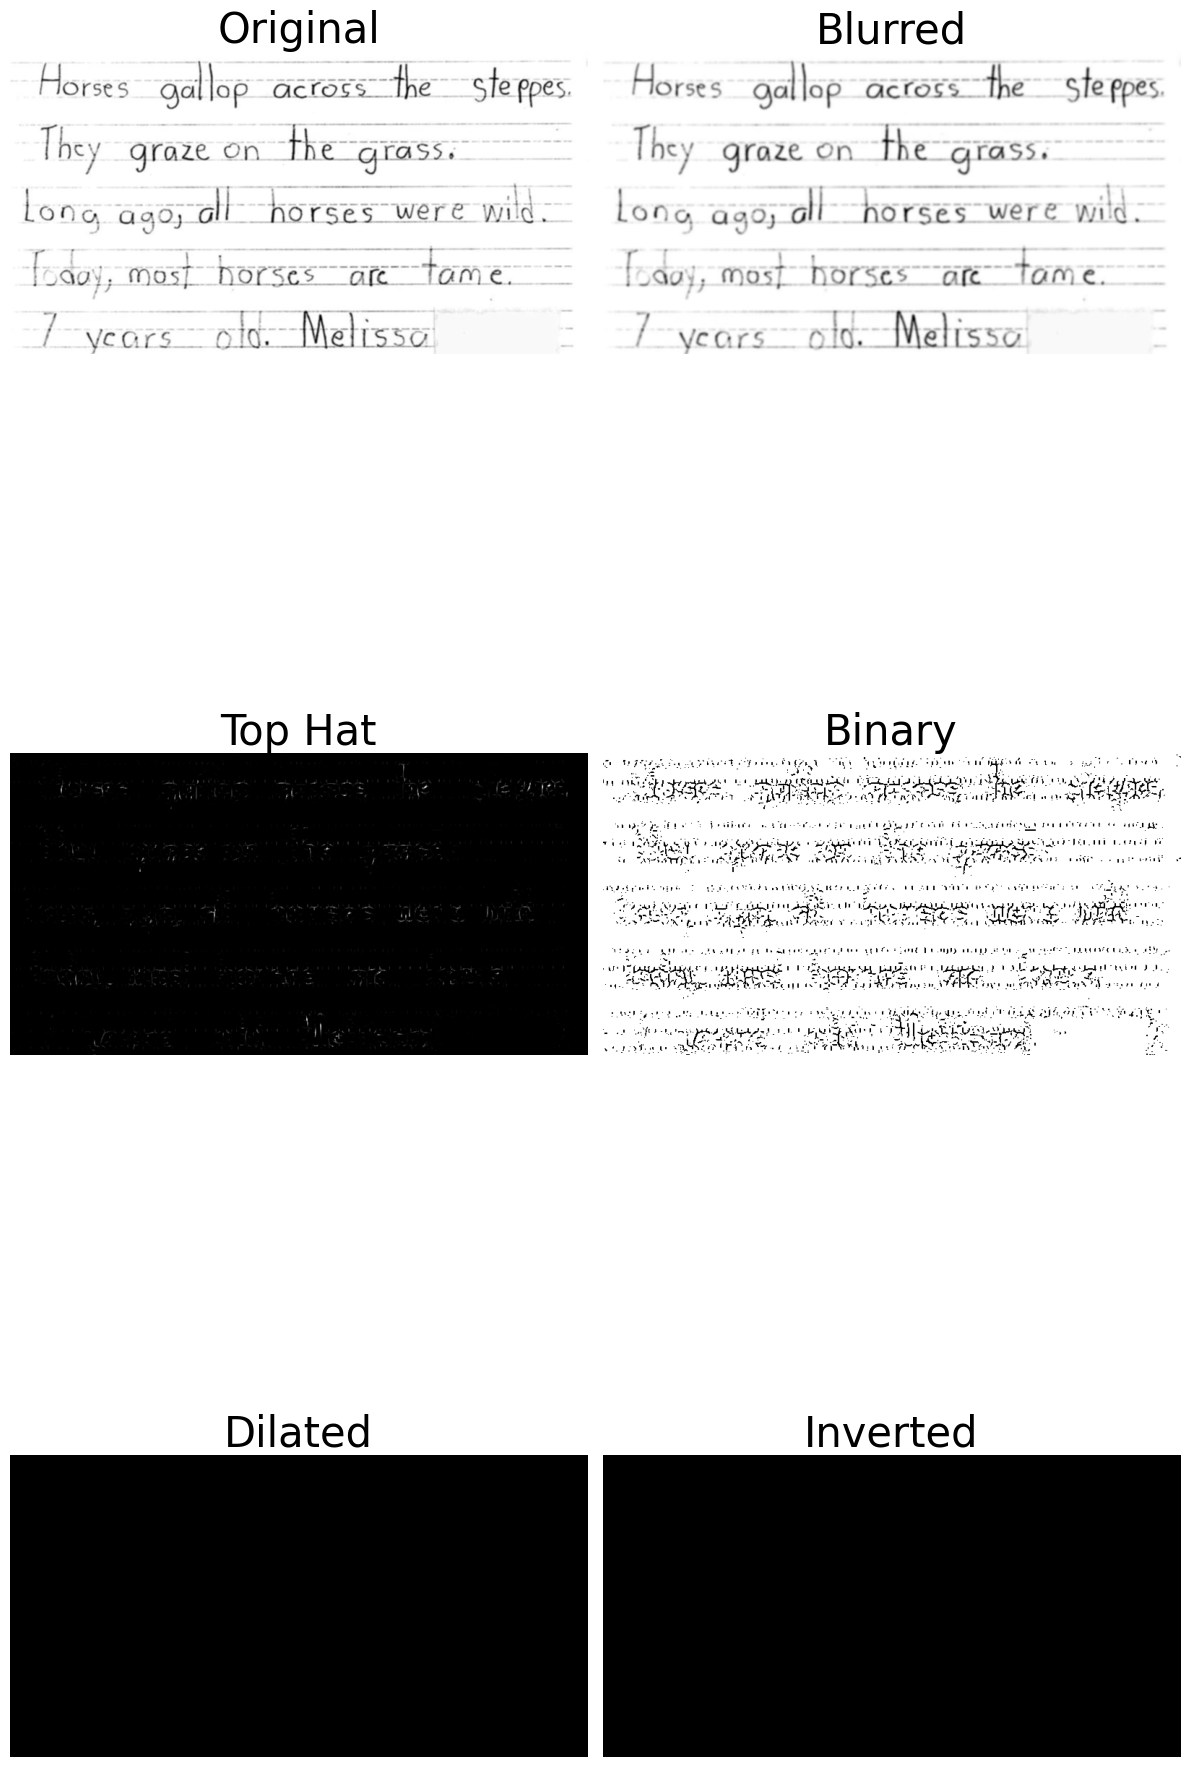

In [20]:
img = base_img

# Apply Gaussian blur
k_filter = (5, 5)
imgBlur = cv2.GaussianBlur(img, k_filter, 0)

# Define a kernel (structuring element)
k_size = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, k_size)

# Apply top hat morphological operation
imgTH = cv2.morphologyEx(imgBlur, cv2.MORPH_TOPHAT, kernel)

# Threshold the image
_, imgBin = cv2.threshold(imgTH, 0, 150, cv2.THRESH_BINARY_INV)

# Dilate the image
imgdil = cv2.dilate(imgBin, kernel)

# Invert the image
_, imgBin_Inv = cv2.threshold(imgdil, 0, 250, cv2.THRESH_BINARY_INV)

# Create a list of images and their corresponding titles
titles = ['Original', 'Blurred', 'Top Hat', 'Binary', 'Dilated', 'Inverted']
images = [img, imgBlur, imgTH, imgBin, imgdil, imgBin_Inv]

_subplot(titles, images)